<a href="https://colab.research.google.com/github/AntonioFialhoSN/Rede-Neurais-Avalia-o-P3-Parte1/blob/main/Rede_Neurais_Avalia%C3%A7%C3%A3o_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados (AED)

In [186]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [187]:
df.shape

(891, 12)

In [188]:
df.info()

# Survival (Sobrevivência):0 = Não 1 = Sim

# Pclass (Classe do passageiro): Proxy para status socioeconômico (NSE) 1ª = Classe alta 2ª = Classe média 3ª = Classe baixa

# sibsp (Número de irmãos/cônjuges a bordo): Irmãos = irmão, irmã, meio-irmão, meia-irmã Cônjuge = marido, esposa (amantes e noivos foram ignorados)

# parch (Número de pais/filhos a bordo): Pais = mãe, pai Filhos = filha, filho, enteada, enteado Algumas crianças viajaram apenas com babá, portanto parch=0 para elas.

# Ticket (Número do bilhete): Número do bilhete

# Fare (Tarifa): Valor pago pela passagem

# Cabin (Cabine):Número da cabine

# Embarked (Porto de embarque): C = Cherbourg Q = Queenstown S = Southampton

# Name (Nome), Sex (Sexo), Age (Idade): Autoexplicativos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [189]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


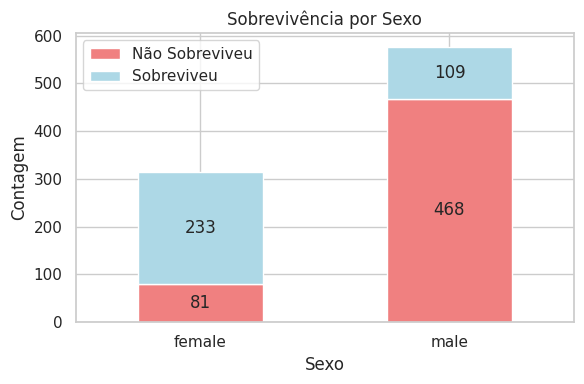

In [190]:
# Stacked bar – sobrevivência por sexo
counts = df.groupby('Sex')['Survived'].value_counts().unstack().fillna(0)
counts.columns = ['Não Sobreviveu', 'Sobreviveu']
ax = counts.plot(kind='bar', stacked=True, color=['lightcoral', 'lightblue'], figsize=(6,4))
plt.title("Sobrevivência por Sexo")
plt.xlabel("Sexo")
plt.ylabel("Contagem")
plt.xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container, label_type='center')
plt.tight_layout()
plt.show()

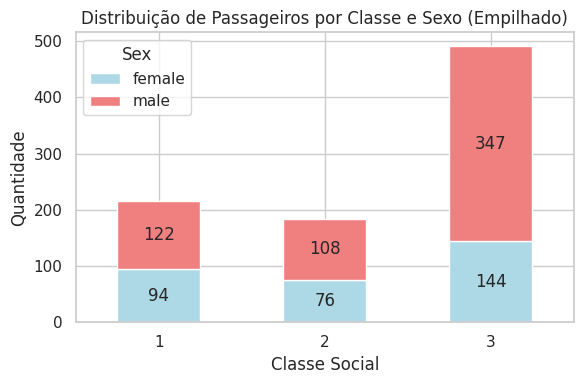

In [191]:
# Agrupa os dados por Classe e Sexo, contando ocorrências
counts = df.groupby('Pclass')['Sex'].value_counts().unstack().fillna(0)

# Define cores pastel para Masculino/Feminino
colors = ['lightblue', 'lightcoral']  # Masculino (azul), Feminino (rosa)

# Plota o gráfico de barras empilhadas
ax = counts.plot(kind='bar', stacked=True, color=colors, figsize=(6,4))
plt.title("Distribuição de Passageiros por Classe e Sexo (Empilhado)")
plt.xlabel("Classe Social")
plt.ylabel("Quantidade")
plt.xticks(rotation=0)

# Adiciona rótulos em cada segmento
for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.tight_layout()
plt.show()

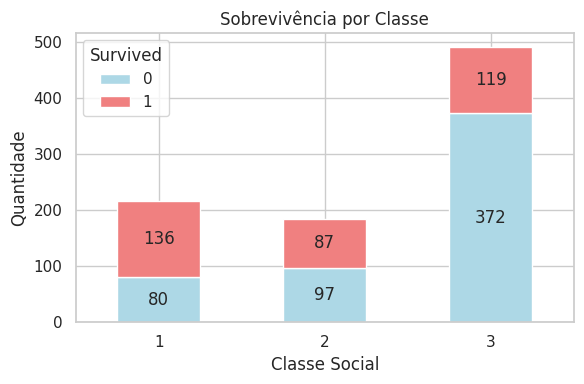

In [192]:
# Agrupa os dados por Classe e Sexo, contando ocorrências
counts = df.groupby('Pclass')['Survived'].value_counts().unstack().fillna(0)

# Define cores pastel para Masculino/Feminino
colors = ['lightblue', 'lightcoral']  # Masculino (azul), Feminino (rosa)

# Plota o gráfico de barras empilhadas
ax = counts.plot(kind='bar', stacked=True, color=colors, figsize=(6,4))
plt.title("Sobrevivência por Classe")
plt.xlabel("Classe Social")
plt.ylabel("Quantidade")
plt.xticks(rotation=0)

# Adiciona rótulos em cada segmento
for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.tight_layout()
plt.show()

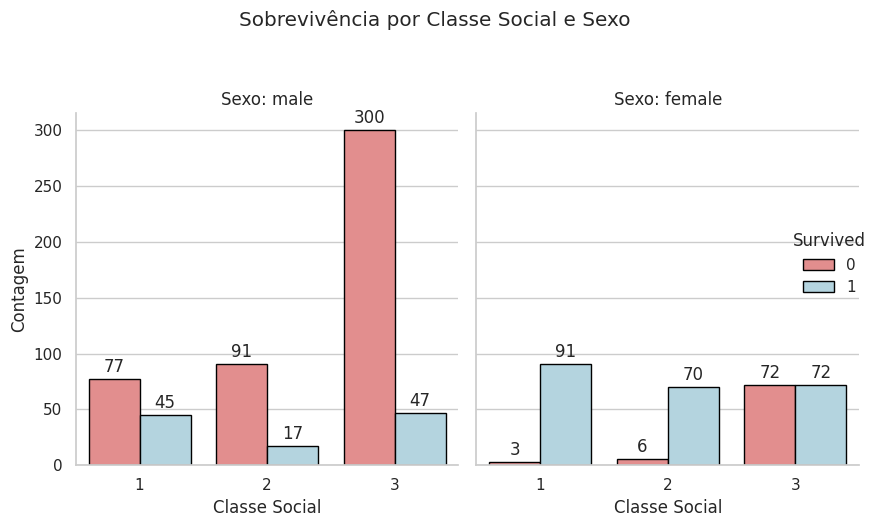

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuração do estilo
sns.set(style="whitegrid")

# Cria subplots separados por Sexo
g = sns.catplot(
    x='Pclass',          # Classe no eixo X
    hue='Survived',      # Sobrevivência como cor
    col='Sex',           # Divide em colunas por Sexo
    data=df,
    kind='count',        # Gráfico de contagem
    palette=['lightcoral', 'lightblue'],  # Cores para Não/Sobreviveu
    edgecolor='black',   # Borda das barras
    height=5,            # Altura
    aspect=0.8           # Proporção
)

# Títulos e labels
g.set_axis_labels("Classe Social", "Contagem")
g.set_titles("Sexo: {col_name}")
g.fig.suptitle("Sobrevivência por Classe Social e Sexo", y=1.05)

# Adiciona rótulos nas barras
for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', padding=2)

plt.tight_layout()
plt.show()

Contagem de Passageiros por Porto de Embarque e Classe:
Pclass      1    2    3
Embarked               
C          85   17   66
Q           2    3   72
S         127  164  353


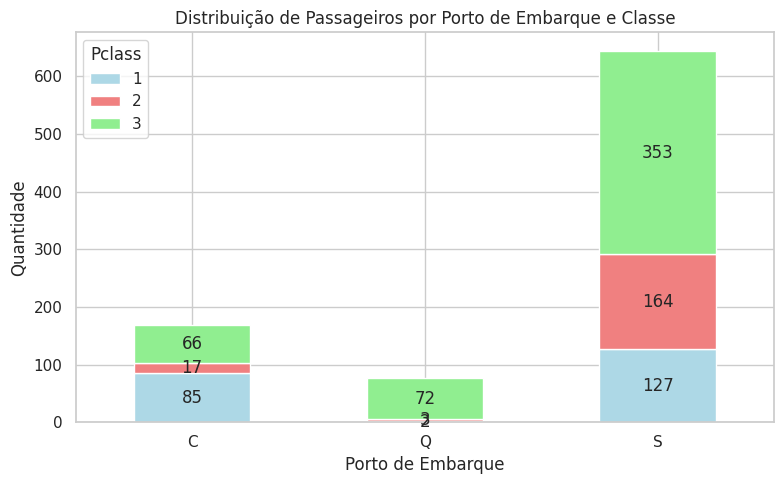

In [201]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Agrupa os dados por 'Embarked' e 'Pclass' ---
counts = df.groupby('Embarked')['Pclass'].value_counts().unstack().fillna(0)

# --- 2. Mostra os dados numéricos no console ---
print("Contagem de Passageiros por Porto de Embarque e Classe:")
print(counts)

# --- 3. Configura o gráfico de barras empilhadas ---
colors = ['lightblue', 'lightcoral', 'lightgreen']  # Cores para cada classe (1ª, 2ª, 3ª)
ax = counts.plot(kind='bar', stacked=True, color=colors, figsize=(8, 5))

# --- 4. Personaliza o gráfico ---
plt.title("Distribuição de Passageiros por Porto de Embarque e Classe")
plt.xlabel("Porto de Embarque")
plt.ylabel("Quantidade")
plt.xticks(rotation=0)

# Adiciona rótulos com os valores
for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.tight_layout()
plt.show()

#Probabilidade

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt
survival_rate = df['Survived'].mean()
print(f"Taxa geral de sobrevivência: {survival_rate:.2%}")

Taxa geral de sobrevivência: 38.38%


In [203]:
print("Probabilidade de sobrevivência por sexo (%):")
print((df.groupby('Sex')['Survived'].mean()).apply(lambda x: f"{x:.1%}"))

Probabilidade de sobrevivência por sexo (%):
Sex
female    74.2%
male      18.9%
Name: Survived, dtype: object


In [204]:
# Probabilidade de sobrevivência por sexo e classe
prob_sobrevivencia_sexo_classe = df.groupby(['Sex', 'Pclass'])['Survived'].mean()

# Formatando para melhor visualização (em percentual)
resultado = prob_sobrevivencia_sexo_classe.unstack().apply(lambda x: x * 100).round(1)

print("Probabilidade de sobrevivência por sexo e classe (%):")
print(resultado)

Probabilidade de sobrevivência por sexo e classe (%):
Pclass     1     2     3
Sex                     
female  96.8  92.1  50.0
male    36.9  15.7  13.5


In [205]:
# Taxa de sobrevivência por local de embarque (em %)
taxa_sobrevivencia_embarque = df.groupby('Embarked')['Survived'].mean() * 100

print("Taxa de sobrevivência por local de embarque (%):")
print(taxa_sobrevivencia_embarque.round(2))

Taxa de sobrevivência por local de embarque (%):
Embarked
C    55.36
Q    38.96
S    33.70
Name: Survived, dtype: float64


In [206]:
# Taxa de sobrevivência por Embarked e Pclass (em %)
sobrevivencia_embarque_classe = df.groupby(['Embarked', 'Pclass'])['Survived'].mean() * 100

# Reorganizando os dados para melhor visualização (formato de tabela)
resultado = sobrevivencia_embarque_classe.unstack().round(1)

print("Taxa de Sobrevivência por Porto de Embarque e Classe Social (%):")
print(resultado)

Taxa de Sobrevivência por Porto de Embarque e Classe Social (%):
Pclass       1     2     3
Embarked                  
C         69.4  52.9  37.9
Q         50.0  66.7  37.5
S         58.3  46.3  19.0


In [207]:
import pandas as pd

# Carregar os dados
df = pd.read_csv("train.csv")

# Calcular taxa de sobrevivência por Embarked, Pclass e Sex (em %)
sobrevivencia = df.groupby(['Embarked', 'Pclass', 'Sex'])['Survived'].mean() * 100

# Reorganizar os dados para melhor visualização
resultado = sobrevivencia.unstack().unstack().round(1)

print("Taxa de Sobrevivência por Porto de Embarque, Classe Social e Sexo (%):")
print(resultado)

# Opcional: Salvar em Excel
resultado.to_excel("sobrevivencia_embarque_classe_sexo.xlsx")

#C = Cherbourg Q = Queenstown S = Southampton

Taxa de Sobrevivência por Porto de Embarque, Classe Social e Sexo (%):
Sex      female               male            
Pclass        1      2     3     1     2     3
Embarked                                      
C          97.7  100.0  65.2  40.5  20.0  23.3
Q         100.0  100.0  72.7   0.0   0.0   7.7
S          95.8   91.0  37.5  35.4  15.5  12.8


## Limpeza de Dados

In [208]:
total_duplicados = df.duplicated().sum()
print(f"Total de linhas duplicadas: {total_duplicados}")

Total de linhas duplicadas: 0


In [209]:
total_valores_faltantes = df.isnull().sum()
print(f"Total de valores faltantes por coluna:\n{total_valores_faltantes}")

Total de valores faltantes por coluna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [210]:
df_1 = df
df_1['Sex'] = df_1['Sex'].map({'male': 0, 'female': 1})
df_1 = df_1.drop(['PassengerId', 'Cabin'], axis=1)
df_2 = df_1
df_2['Embarked'] = df_2['Embarked'].fillna('S')
df_2['Embarked'] = df_2['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_2 = df_2.drop(['Ticket'], axis=1)

df_2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,2
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,2


In [211]:
df_2['Name'].str.extract(' ([A-Za-z]+)\.', expand=False).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

/tmp/ipython-input-212-3034418037.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=title_counts.index, y=title_counts.values, palette='viridis')


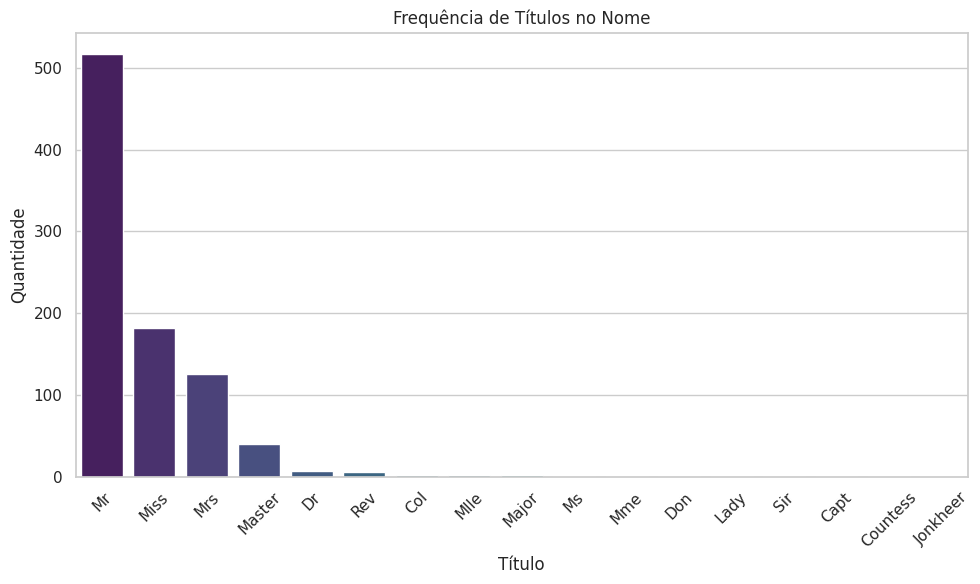

In [212]:
df_2['Title'] = df_2['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# Contagem dos títulos
title_counts = df_2['Title'].value_counts()

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=title_counts.index, y=title_counts.values, palette='viridis')
plt.xlabel('Título')
plt.ylabel('Quantidade')
plt.title('Frequência de Títulos no Nome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [213]:
missing_age_by_title = df_2[df_2['Age'].isna()].groupby('Title').size().reset_index(name='Missing_Age_Count')

# Total de passageiros por título
total_by_title = df_2['Title'].value_counts().reset_index(name='Total_Count')

# Juntar com a contagem de missing
missing_stats = pd.merge(missing_age_by_title, total_by_title, on='Title')

# Calcular porcentagem de missing
missing_stats['Missing_Percentage'] = (missing_stats['Missing_Age_Count'] / missing_stats['Total_Count']) * 100

# Ordenar do maior para o menor
missing_stats = missing_stats.sort_values('Missing_Percentage', ascending=False)

print(missing_stats)

    Title  Missing_Age_Count  Total_Count  Missing_Percentage
3      Mr                119          517           23.017408
2    Miss                 36          182           19.780220
0      Dr                  1            7           14.285714
4     Mrs                 17          125           13.600000
1  Master                  4           40           10.000000


In [214]:
# Calcular a mediana de idade por título
median_age_by_title = df_2.groupby('Title')['Age'].median().reset_index()

# Criar um dicionário de mapeamento título -> mediana
title_median_map = median_age_by_title.set_index('Title')['Age'].to_dict()

# Preencher os valores NaN usando o mapa
df_2['Age'] = df_2.apply(
    lambda row: title_median_map[row['Title']] if pd.isna(row['Age']) else row['Age'],
    axis=1
)

# Verificar se ainda há NaN
print("Valores NaN restantes em Age:", df_2['Age'].isna().sum())

Valores NaN restantes em Age: 0


In [215]:
least_occuring = ['Don', 'Rev', 'Dr', 'Mme', 'Ms',
                  'Major', 'Lady', 'Sir', 'Mlle', 'Col',
                  'Capt', 'Countess', 'Jonkheer']


df_2['Title'] = df_2['Title'].replace(least_occuring, 'Rare')

In [216]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df_2['Title'] = df_2['Title'].map(title_mapping)
df_2.drop('Name', axis=1, inplace=True)

In [217]:
df_2['Title'].unique()

array([1, 3, 2, 4, 5])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
 8   Title     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


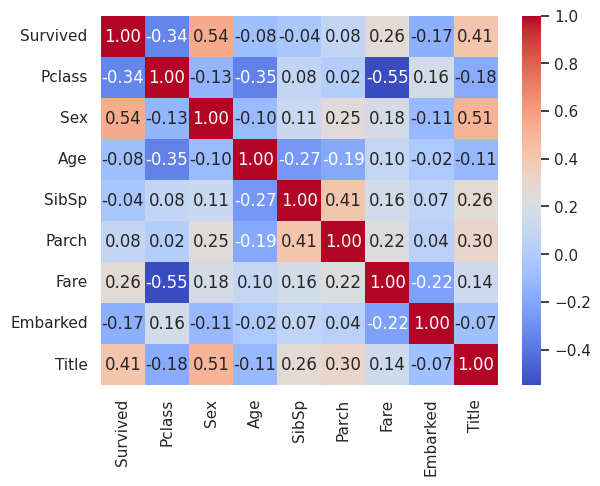

In [218]:
df_2.info()
corr_train = df_2.corr()
sns.heatmap(corr_train, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [219]:
df_3 = df_2.drop(['Survived'],axis=1)
df_3.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,22.0,1,0,7.2500,2,1
1,1,1,38.0,1,0,71.2833,0,3
2,3,1,26.0,0,0,7.9250,2,2
3,1,1,35.0,1,0,53.1000,2,3
4,3,0,35.0,0,0,8.0500,2,1


In [220]:
df_3['PclassSex'] = df_3['Pclass'] * 10 + df_3['Sex']
df_3['FamilySize'] = df_3['SibSp'] + df_3['Parch'] + 1
df_3.drop(['SibSp', 'Parch','Pclass', 'Sex'], axis=1, inplace=True)
df_3.head()

,Age,Fare,Embarked,Title,PclassSex,FamilySize
0,22.0,7.2500,2,1,30,2
1,38.0,71.2833,0,3,11,2
2,26.0,7.9250,2,2,31,1
3,35.0,53.1000,2,3,11,2
4,35.0,8.0500,2,1,30,1


In [221]:
df_3.describe()

,Age,Fare,Embarked,Title,PclassSex,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.390202,32.204208,1.536476,1.740741,23.438833,1.904602
std,13.265322,49.693429,0.791503,1.052077,8.311182,1.613459
min,0.420000,0.000000,0.000000,1.000000,10.000000,1.000000
25%,21.000000,7.910400,1.000000,1.000000,20.000000,1.000000
50%,30.000000,14.454200,2.000000,1.000000,30.000000,1.000000
75%,35.000000,31.000000,2.000000,2.000000,30.000000,2.000000
max,80.000000,512.329200,2.000000,5.000000,31.000000,11.000000


In [222]:
df_4 = df_3
df_4 = df_4[df_4['Fare'] <= 300]
df_4.describe()

,Age,Fare,Embarked,Title,PclassSex,FamilySize
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,29.370124,30.582164,1.541667,1.742117,23.483108,1.906532
std,13.283197,41.176366,0.787772,1.053231,8.290100,1.615609
min,0.420000,0.000000,0.000000,1.000000,10.000000,1.000000
25%,21.000000,7.895800,1.000000,1.000000,20.000000,1.000000
50%,30.000000,14.454200,2.000000,1.000000,30.000000,1.000000
75%,35.000000,30.771850,2.000000,2.000000,30.000000,2.000000
max,80.000000,263.000000,2.000000,5.000000,31.000000,11.000000


In [223]:
df_2 = df_2[df_2['Fare'] <= 300]

In [224]:
contagem = (df_3['Fare'] > 300).sum()
print(f"Número de passageiros com Fare > 300 (Antes de retirar outliers): {contagem}")
contagem = (df_4['Fare'] > 300).sum()
print(f"Número de passageiros com Fare > 300: {contagem}")

Número de passageiros com Fare > 300 (Antes de retirar outliers): 3
Número de passageiros com Fare > 300: 0


<class 'pandas.core.frame.DataFrame'>
Index: 888 entries, 0 to 890
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         888 non-null    float64
 1   Fare        888 non-null    float64
 2   Embarked    888 non-null    int64  
 3   Title       888 non-null    int64  
 4   PclassSex   888 non-null    int64  
 5   FamilySize  888 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 48.6 KB


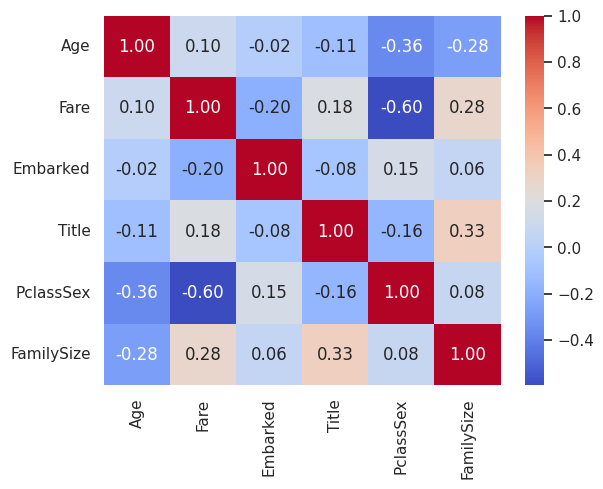

In [242]:
df_4.info()
corr_train = df_4.corr()
sns.heatmap(corr_train, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

#Normalização de Dados



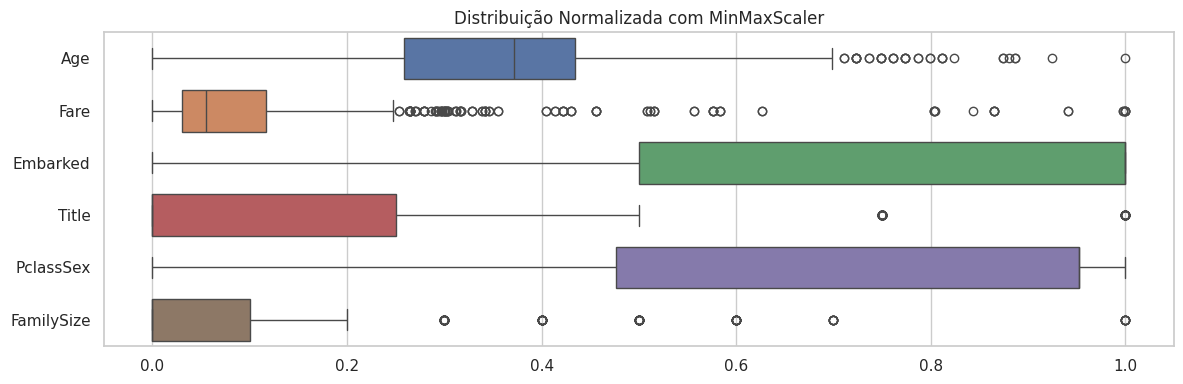

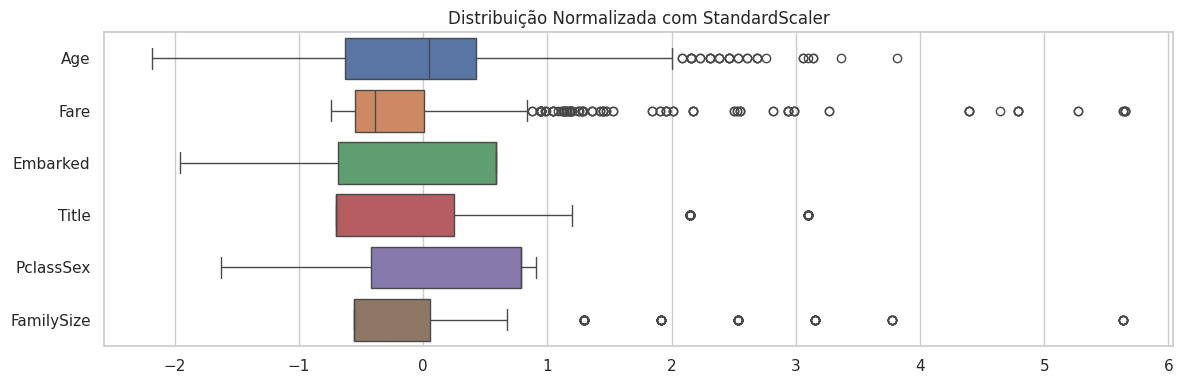

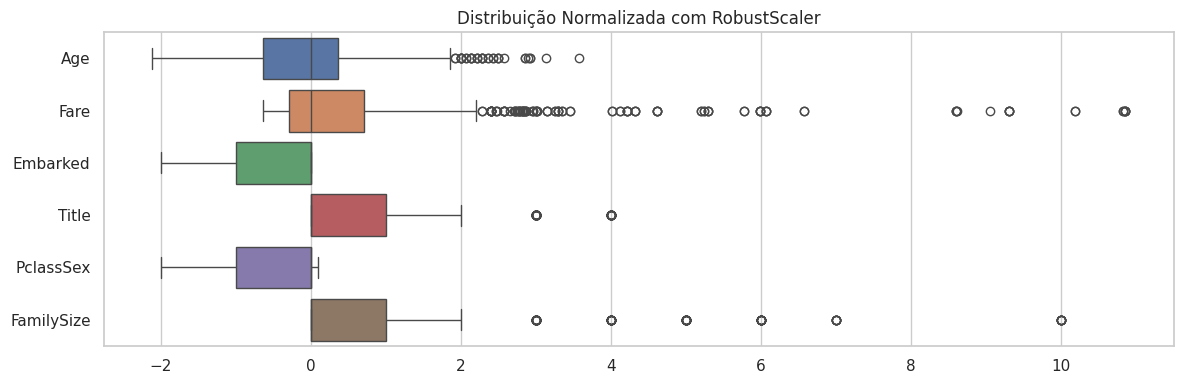

In [225]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Instancia um objeto MinMaxScaler, que será usado para a normalização Min-Max
scaler_minmax = MinMaxScaler()

# Instancia um objeto StandardScaler, que será usado para a padronização Z-score
scaler_zscore = StandardScaler()

# Instancia um objeto RobustScaler, que será usado para a normalização robusta a outliers
scaler_robust = RobustScaler()


# === Primeira Aplicação e Visualização dos Scalers (em df_3) ===

# Aplica o MinMaxScaler ao DataFrame df_3 (calcula min/max e transforma)
# O resultado é convertido de volta para um DataFrame do Pandas com as colunas originais
df_4_scaled_minmax = pd.DataFrame(scaler_minmax.fit_transform(df_4), columns=df_4.columns)

# Aplica o StandardScaler ao DataFrame df_4 (calcula média/desvio padrão e transforma)
# O resultado é convertido de volta para um DataFrame do Pandas
df_4_scaled_zscore = pd.DataFrame(scaler_zscore.fit_transform(df_4), columns=df_4.columns)

# Aplica o RobustScaler ao DataFrame df_4 (calcula mediana/IQR e transforma)
# O resultado é convertido de volta para um DataFrame do Pandas
df_4_scaled_robust = pd.DataFrame(scaler_robust.fit_transform(df_4), columns=df_4.columns)

# Configura o tamanho da figura para o primeiro boxplot
plt.figure(figsize=(12, 4))
# Plota um boxplot horizontal dos dados escalonados com MinMaxScaler
sns.boxplot(data=df_4_scaled_minmax, orient='h')
plt.title("Distribuição Normalizada com MinMaxScaler")
# Ajusta o layout para evitar sobreposição de elementos
plt.tight_layout()

# Configura o tamanho da figura para o segundo boxplot
plt.figure(figsize=(12, 4))
# Plota um boxplot horizontal dos dados escalonados com StandardScaler
sns.boxplot(data=df_4_scaled_zscore, orient='h')
plt.title("Distribuição Normalizada com StandardScaler")
# Ajusta o layout
plt.tight_layout()

# Configura o tamanho da figura para o terceiro boxplot
plt.figure(figsize=(12, 4))
# Plota um boxplot horizontal dos dados escalonados com RobustScaler
sns.boxplot(data=df_4_scaled_robust, orient='h')
plt.title("Distribuição Normalizada com RobustScaler")
# Ajusta o layout
plt.tight_layout()
# Exibe todos os gráficos criados
plt.show()

#Redes Neurais


In [226]:
import tensorflow as tf
import keras
from keras.layers import Dense, Input
from keras.regularizers import l2
from keras.models import Sequential
from tensorflow.keras import layers, callbacks, initializers
import random
import os
import numpy as np

# 1. Definir todas as sementes
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [227]:
from sklearn.model_selection import train_test_split

Y = df_2["Survived"]


X = df_4.values[0:888]
scaler_robust = RobustScaler()
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

x_train_robust = scaler_robust.fit_transform(X)
X_train_standard = scaler_standard.fit_transform(X)
X_train_minmax = scaler_minmax.fit_transform(X)


X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(x_train_robust, Y, test_size=0.2, random_state=SEED, stratify=Y)
X_train_z, X_test_z, y_train_z, y_test_z = train_test_split(X_train_standard, Y, test_size=0.2, random_state=SEED, stratify=Y)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_train_minmax, Y, test_size=0.2, random_state=SEED, stratify=Y)

In [228]:
model = Sequential([
    Dense(32, input_shape=(X_train_r.shape[1],),
          activation='relu',
          kernel_initializer=initializers.HeNormal(seed=SEED),
          kernel_regularizer=l2(0.01)),
    Dense(64, activation='relu',
          kernel_initializer=initializers.HeNormal(seed=SEED),
          kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid',kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.05, seed=42))
])


# model.save_weights('model_weights.weights.h5')
# model.load_weights('model_weights.weights.h5')

# Verificar pesos
for i, layer in enumerate(model.layers):
    weights = layer.get_weights()
    print(f"Layer {i} ({layer.name}):")
    if weights:
        print(f"  Weights shape: {weights[0].shape}")
        print(f"  Bias shape:    {weights[1].shape}")
        # Mostrar apenas alguns valores para não poluir a saída
        print(f"  First weight: {weights[0][0][0]:.5f}")
        print(f"  First bias:    {weights[1][0]:.5f}")
    else:
        print("  No weights")

Layer 0 (dense_6):
  Weights shape: (6, 32)
  Bias shape:    (32,)
  First weight: 0.01038
  First bias:    0.00000
Layer 1 (dense_7):
  Weights shape: (32, 64)
  Bias shape:    (64,)
  First weight: 0.00450
  First bias:    0.00000
Layer 2 (dense_8):
  Weights shape: (64, 1)
  Bias shape:    (1,)
  First weight: 0.00079
  First bias:    0.00000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [229]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,401 (9.38 KB)

 Trainable params: 2,401 (9.38 KB)

 Non-trainable params: 0 (0.00 B)

In [230]:
model.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), metrics = ['acc'])
history = model.fit(
    X_train_r, y_train_r,
    validation_data=(X_test_r, y_test_r),
    epochs=60,
    batch_size=16,
    verbose=2,
)

Epoch 1/60
45/45 - 2s - 50ms/step - acc: 0.6718 - loss: 2.3622 - val_acc: 0.8034 - val_loss: 2.1489
Epoch 2/60
45/45 - 0s - 7ms/step - acc: 0.7831 - loss: 1.9820 - val_acc: 0.8034 - val_loss: 1.8219
Epoch 3/60
45/45 - 1s - 11ms/step - acc: 0.7690 - loss: 1.6926 - val_acc: 0.7809 - val_loss: 1.5701
Epoch 4/60
45/45 - 0s - 7ms/step - acc: 0.7704 - loss: 1.4692 - val_acc: 0.7865 - val_loss: 1.3755
Epoch 5/60
45/45 - 0s - 4ms/step - acc: 0.7732 - loss: 1.2970 - val_acc: 0.7865 - val_loss: 1.2248
Epoch 6/60
45/45 - 0s - 7ms/step - acc: 0.7690 - loss: 1.1634 - val_acc: 0.7865 - val_loss: 1.1068
Epoch 7/60
45/45 - 0s - 6ms/step - acc: 0.7732 - loss: 1.0572 - val_acc: 0.7978 - val_loss: 1.0128
Epoch 8/60
45/45 - 0s - 7ms/step - acc: 0.7817 - loss: 0.9721 - val_acc: 0.8090 - val_loss: 0.9365
Epoch 9/60
45/45 - 0s - 4ms/step - acc: 0.7845 - loss: 0.9034 - val_acc: 0.8090 - val_loss: 0.8745
Epoch 10/60
45/45 - 0s - 7ms/step - acc: 0.7901 - loss: 0.8478 - val_acc: 0.8090 - val_loss: 0.8244
Epoch 1

###Treinamento do Modelo com Robust

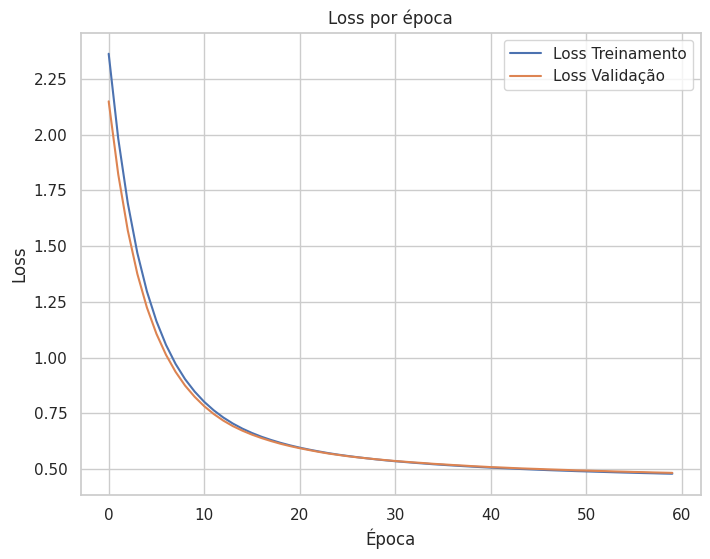

In [231]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Loss Treinamento')
plt.plot(history.history['val_loss'], label='Loss Validação')
plt.title('Loss por época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [232]:
from sklearn import metrics
import numpy as np
Y_pred_rand = (model.predict(X_train_r) > 0.5).astype(int)
print('Precision : ', np.round(metrics.precision_score(y_train_r, Y_pred_rand)*100,2))
print('Accuracy : ', np.round(metrics.accuracy_score(y_train_r, Y_pred_rand)*100,2))
print('Recall : ', np.round(metrics.recall_score(y_train_r, Y_pred_rand)*100,2))
print('F1 score : ', np.round(metrics.f1_score(y_train_r, Y_pred_rand)*100,2))

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Precision :  78.97
Accuracy :  82.39
Recall :  73.43
F1 score :  76.1


In [233]:
Y_pred_rand = (model.predict(X_test_r) > 0.5).astype(int)
print('Precision : ', np.round(metrics.precision_score(y_test_r, Y_pred_rand)*100,2))
print('Accuracy : ', np.round(metrics.accuracy_score(y_test_r, Y_pred_rand)*100,2))
print('Recall : ', np.round(metrics.recall_score(y_test_r, Y_pred_rand)*100,2))
print('F1 score : ', np.round(metrics.f1_score(y_test_r, Y_pred_rand)*100,2))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Precision :  79.69
Accuracy :  83.15
Recall :  75.0
F1 score :  77.27


###Treinamento do Modelo com Z-score

In [234]:
model.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), metrics = ['acc'])
history = model.fit(
    X_train_z, y_train_z,
    validation_data=(X_test_z, y_test_z),
    epochs=60,
    batch_size=16,
    verbose=2,
)

Epoch 1/60
45/45 - 2s - 35ms/step - acc: 0.7620 - loss: 0.5480 - val_acc: 0.8090 - val_loss: 0.5137
Epoch 2/60
45/45 - 0s - 10ms/step - acc: 0.7789 - loss: 0.5098 - val_acc: 0.8202 - val_loss: 0.4994
Epoch 3/60
45/45 - 0s - 7ms/step - acc: 0.7930 - loss: 0.4999 - val_acc: 0.8258 - val_loss: 0.4924
Epoch 4/60
45/45 - 0s - 7ms/step - acc: 0.8127 - loss: 0.4938 - val_acc: 0.8427 - val_loss: 0.4873
Epoch 5/60
45/45 - 0s - 7ms/step - acc: 0.8225 - loss: 0.4893 - val_acc: 0.8371 - val_loss: 0.4834
Epoch 6/60
45/45 - 0s - 7ms/step - acc: 0.8211 - loss: 0.4859 - val_acc: 0.8371 - val_loss: 0.4803
Epoch 7/60
45/45 - 0s - 6ms/step - acc: 0.8296 - loss: 0.4829 - val_acc: 0.8371 - val_loss: 0.4777
Epoch 8/60
45/45 - 0s - 4ms/step - acc: 0.8310 - loss: 0.4805 - val_acc: 0.8371 - val_loss: 0.4756
Epoch 9/60
45/45 - 0s - 4ms/step - acc: 0.8352 - loss: 0.4782 - val_acc: 0.8371 - val_loss: 0.4735
Epoch 10/60
45/45 - 0s - 8ms/step - acc: 0.8366 - loss: 0.4762 - val_acc: 0.8371 - val_loss: 0.4719
Epoch 1

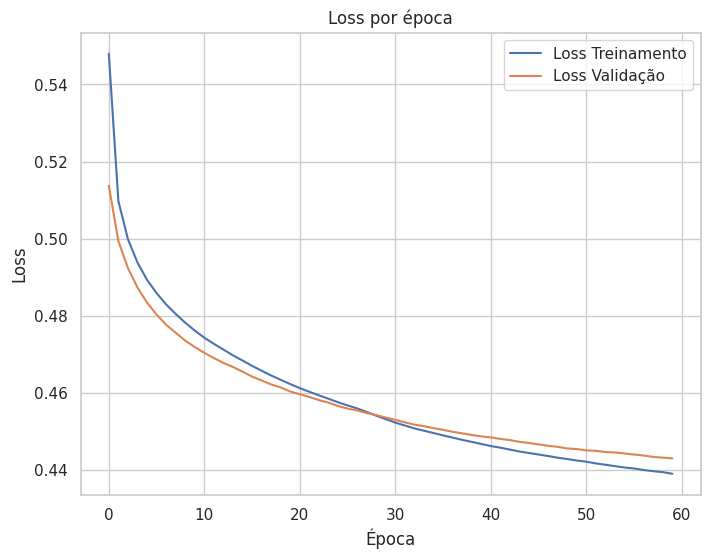

In [235]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Loss Treinamento')
plt.plot(history.history['val_loss'], label='Loss Validação')
plt.title('Loss por época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [236]:
Y_pred_rand = (model.predict(X_train_z) > 0.5).astype(int)
print('Precision : ', np.round(metrics.precision_score(y_train_z, Y_pred_rand)*100,2))
print('Accuracy : ', np.round(metrics.accuracy_score(y_train_z, Y_pred_rand)*100,2))
print('Recall : ', np.round(metrics.recall_score(y_train_z, Y_pred_rand)*100,2))
print('F1 score : ', np.round(metrics.f1_score(y_train_z, Y_pred_rand)*100,2))

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Precision :  85.09
Accuracy :  84.37
Recall :  71.59
F1 score :  77.76


In [237]:
Y_pred_rand = (model.predict(X_test_z) > 0.5).astype(int)
print('Precision : ', np.round(metrics.precision_score(y_test_z, Y_pred_rand)*100,2))
print('Accuracy : ', np.round(metrics.accuracy_score(y_test_z, Y_pred_rand)*100,2))
print('Recall : ', np.round(metrics.recall_score(y_test_z, Y_pred_rand)*100,2))
print('F1 score : ', np.round(metrics.f1_score(y_test_z, Y_pred_rand)*100,2))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Precision :  81.67
Accuracy :  83.15
Recall :  72.06
F1 score :  76.56


###Treinamento do Modelo com Min-Max

In [238]:
model.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), metrics = ['acc'])
history = model.fit(
    X_train_m, y_train_m,
    validation_data=(X_test_m, y_test_m),
    epochs=60,
    batch_size=16,
    verbose=2,
)

Epoch 1/60
45/45 - 2s - 54ms/step - acc: 0.7535 - loss: 0.5573 - val_acc: 0.7640 - val_loss: 0.5452
Epoch 2/60
45/45 - 1s - 18ms/step - acc: 0.7634 - loss: 0.5349 - val_acc: 0.7809 - val_loss: 0.5282
Epoch 3/60
45/45 - 0s - 4ms/step - acc: 0.7789 - loss: 0.5250 - val_acc: 0.8090 - val_loss: 0.5204
Epoch 4/60
45/45 - 0s - 6ms/step - acc: 0.7887 - loss: 0.5193 - val_acc: 0.8090 - val_loss: 0.5158
Epoch 5/60
45/45 - 0s - 7ms/step - acc: 0.7887 - loss: 0.5151 - val_acc: 0.8090 - val_loss: 0.5125
Epoch 6/60
45/45 - 0s - 4ms/step - acc: 0.7986 - loss: 0.5119 - val_acc: 0.8034 - val_loss: 0.5099
Epoch 7/60
45/45 - 0s - 7ms/step - acc: 0.8000 - loss: 0.5095 - val_acc: 0.8090 - val_loss: 0.5076
Epoch 8/60
45/45 - 0s - 7ms/step - acc: 0.8113 - loss: 0.5076 - val_acc: 0.8090 - val_loss: 0.5057
Epoch 9/60
45/45 - 0s - 4ms/step - acc: 0.8197 - loss: 0.5060 - val_acc: 0.8090 - val_loss: 0.5042
Epoch 10/60
45/45 - 0s - 7ms/step - acc: 0.8197 - loss: 0.5045 - val_acc: 0.8090 - val_loss: 0.5028
Epoch 1

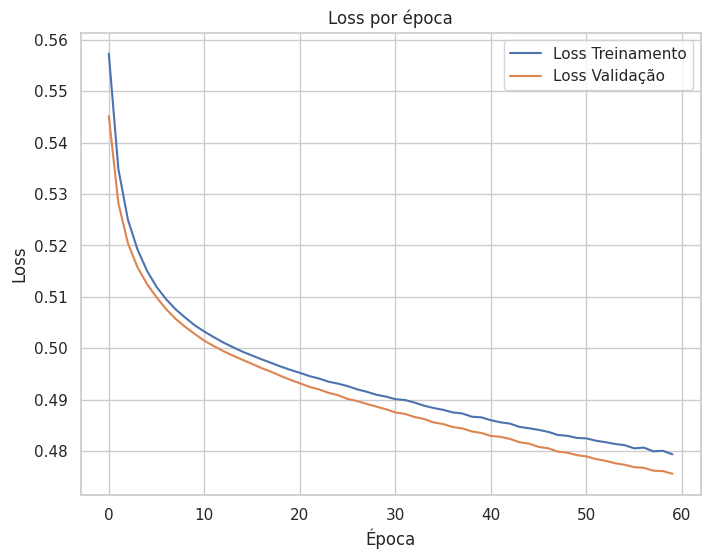

In [239]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Loss Treinamento')
plt.plot(history.history['val_loss'], label='Loss Validação')
plt.title('Loss por época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [240]:
Y_pred_rand = (model.predict(X_train_m) > 0.5).astype(int)
print('Precision : ', np.round(metrics.precision_score(y_train_m, Y_pred_rand)*100,2))
print('Accuracy : ', np.round(metrics.accuracy_score(y_train_m, Y_pred_rand)*100,2))
print('Recall : ', np.round(metrics.recall_score(y_train_m, Y_pred_rand)*100,2))
print('F1 score : ', np.round(metrics.f1_score(y_train_m, Y_pred_rand)*100,2))

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Precision :  85.05
Accuracy :  82.96
Recall :  67.16
F1 score :  75.05


In [241]:
Y_pred_rand = (model.predict(X_test_m) > 0.5).astype(int)
print('Precision : ', np.round(metrics.precision_score(y_test_m, Y_pred_rand)*100,2))
print('Accuracy : ', np.round(metrics.accuracy_score(y_test_m, Y_pred_rand)*100,2))
print('Recall : ', np.round(metrics.recall_score(y_test_m, Y_pred_rand)*100,2))
print('F1 score : ', np.round(metrics.f1_score(y_test_m, Y_pred_rand)*100,2))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 
Precision :  83.33
Accuracy :  82.02
Recall :  66.18
F1 score :  73.77
